In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
#Filters warnings
from warnings import filterwarnings 

In [2]:
#Loading file into Path
data = Path('../Resources/health_insurance_raw_data.csv')
#Reading data file
health_insurance_df = pd.read_csv(data)
health_insurance_df.head()

,patient,Visit Date,Age,Patient_Gender,diagnosis type,diagnosis Code,diagnosis Description,Code,Code Description,Quantity,...,payment Amount,Column1,Column2,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Patient - 2112140237,2021-12-14 00:00:00.000,37,Male,Principal,K21.9,Gastro-esophageal reflux disease without esoph...,1738-111911-1006,(SODIUM CHLORIDE : 9 MG/ML) SOLUTION FOR INFU...,1.0,...,3.00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Patient - 2002110188,2020-07-21 00:00:00.000,38,Male,Principal,I21.3,ST elevation (STEMI) myocardial infarction of ...,0993-385501-0391,(CLOPIDOGREL (AS BESILATE) : 75 MG) FILM COAT...,4.0,...,0.00,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Patient - 1510110229,2020-05-12 00:00:00.000,59,Male,Principal,B34.2,"Coronavirus infection, unspecified",0137-242802-0342,(PANTOPRAZOLE (AS SODIUM) : 40 MG) ENTERIC CO...,2.0,...,5.36,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Patient - 2312040128,2023-12-06 00:00:00.000,38,Male,Principal,I69.354,Hemiplegia and hemiparesis following cerebral ...,0027-179203-0391,(AMLODIPINE : 5 MG) (VALSARTAN : 160 MG) FILM...,7.0,...,51.66,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Patient - 2311110151,2023-11-23 00:00:00.000,44,Male,Principal,J32.9,"Chronic sinusitis, unspecified",0355-120201-0381,(GENTAMICIN : 0.3%) EYE OINTMENT,1.0,...,8.50,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Keeping required data columns
health_insurance_df = health_insurance_df[['patient', 'Age', 'Patient_Gender', 'diagnosis Code', 'diagnosis Description', 'Code', 'Code Description', 'Quantity', 'StatusDescription', 'net', 'payment Amount']]
health_insurance_df.head()

,patient,Age,Patient_Gender,diagnosis Code,diagnosis Description,Code,Code Description,Quantity,StatusDescription,net,payment Amount
0,Patient - 2112140237,37,Male,K21.9,Gastro-esophageal reflux disease without esoph...,1738-111911-1006,(SODIUM CHLORIDE : 9 MG/ML) SOLUTION FOR INFU...,1.0,New,3.00,3.00
1,Patient - 2002110188,38,Male,I21.3,ST elevation (STEMI) myocardial infarction of ...,0993-385501-0391,(CLOPIDOGREL (AS BESILATE) : 75 MG) FILM COAT...,4.0,Rejected,17.44,0.00
2,Patient - 1510110229,59,Male,B34.2,"Coronavirus infection, unspecified",0137-242802-0342,(PANTOPRAZOLE (AS SODIUM) : 40 MG) ENTERIC CO...,2.0,Paid,5.36,5.36
3,Patient - 2312040128,38,Male,I69.354,Hemiplegia and hemiparesis following cerebral ...,0027-179203-0391,(AMLODIPINE : 5 MG) (VALSARTAN : 160 MG) FILM...,7.0,New,51.66,51.66
4,Patient - 2311110151,44,Male,J32.9,"Chronic sinusitis, unspecified",0355-120201-0381,(GENTAMICIN : 0.3%) EYE OINTMENT,1.0,New,8.50,8.50


In [4]:
#Summary Stats 
health_insurance_df.describe()

,Age,Quantity,net,payment Amount
count,215585.000000,215585.000000,215585.000000,215585.000000
mean,43.329805,3.100749,242.908670,168.972008
std,17.804731,6.987850,2680.714944,2205.605117
min,1.000000,0.200000,0.000000,0.000000
25%,33.000000,1.000000,4.050000,0.590000
50%,42.000000,1.000000,10.720000,5.500000
75%,55.000000,2.000000,27.160000,19.900000
max,138.000000,1000.000000,146838.000000,146838.000000


In [5]:
#Renaming Columns 
health_insurance_df.rename(columns={
    'patient': 'Patient',
    'Patient_Gender': 'Sex',
    'diagnosis Code': 'Diagnosis_Code',
    'diagnosis Description': 'Diagnosis_Description',
    'Code': 'Med_Code',
    'Code Description': 'Med_Description',
    'StatusDescription': 'Status',
    'net': "Amount_Billed",
    'payment Amount': 'Amount_Paid'
    }, inplace=True)
health_insurance_df.head()

,Patient,Age,Sex,Diagnosis_Code,Diagnosis_Description,Med_Code,Med_Description,Quantity,Status,Amount_Billed,Amount_Paid
0,Patient - 2112140237,37,Male,K21.9,Gastro-esophageal reflux disease without esoph...,1738-111911-1006,(SODIUM CHLORIDE : 9 MG/ML) SOLUTION FOR INFU...,1.0,New,3.00,3.00
1,Patient - 2002110188,38,Male,I21.3,ST elevation (STEMI) myocardial infarction of ...,0993-385501-0391,(CLOPIDOGREL (AS BESILATE) : 75 MG) FILM COAT...,4.0,Rejected,17.44,0.00
2,Patient - 1510110229,59,Male,B34.2,"Coronavirus infection, unspecified",0137-242802-0342,(PANTOPRAZOLE (AS SODIUM) : 40 MG) ENTERIC CO...,2.0,Paid,5.36,5.36
3,Patient - 2312040128,38,Male,I69.354,Hemiplegia and hemiparesis following cerebral ...,0027-179203-0391,(AMLODIPINE : 5 MG) (VALSARTAN : 160 MG) FILM...,7.0,New,51.66,51.66
4,Patient - 2311110151,44,Male,J32.9,"Chronic sinusitis, unspecified",0355-120201-0381,(GENTAMICIN : 0.3%) EYE OINTMENT,1.0,New,8.50,8.50


In [6]:
#Removing the Patient string and just keeping numerical identifier
health_insurance_df['Patient'] = health_insurance_df['Patient'].str.replace("Patient - ", "")
health_insurance_df

,Patient,Age,Sex,Diagnosis_Code,Diagnosis_Description,Med_Code,Med_Description,Quantity,Status,Amount_Billed,Amount_Paid
0,2112140237,37,Male,K21.9,Gastro-esophageal reflux disease without esoph...,1738-111911-1006,(SODIUM CHLORIDE : 9 MG/ML) SOLUTION FOR INFU...,1.0,New,3.00,3.00
1,2002110188,38,Male,I21.3,ST elevation (STEMI) myocardial infarction of ...,0993-385501-0391,(CLOPIDOGREL (AS BESILATE) : 75 MG) FILM COAT...,4.0,Rejected,17.44,0.00
2,1510110229,59,Male,B34.2,"Coronavirus infection, unspecified",0137-242802-0342,(PANTOPRAZOLE (AS SODIUM) : 40 MG) ENTERIC CO...,2.0,Paid,5.36,5.36
3,2312040128,38,Male,I69.354,Hemiplegia and hemiparesis following cerebral ...,0027-179203-0391,(AMLODIPINE : 5 MG) (VALSARTAN : 160 MG) FILM...,7.0,New,51.66,51.66
4,2311110151,44,Male,J32.9,"Chronic sinusitis, unspecified",0355-120201-0381,(GENTAMICIN : 0.3%) EYE OINTMENT,1.0,New,8.50,8.50
...,...,...,...,...,...,...,...,...,...,...,...
215580,2005070022,55,Female,K81.0,Acute cholecystitis,0090-202001-0781,(ERTAPENEM : 1 G) POWDER FOR INFUSION,1.0,New,274.50,274.50
215581,2111050075,49,Male,I21.4,Non-ST elevation (NSTEMI) myocardial infarction,0071-285601-2001,(TRIMETAZIDINE : 35 MG) MODIFIED RELEASE TABLETS,2.0,New,2.08,2.08
215582,1511020408,41,Female,H81.11,"Benign paroxysmal vertigo, right ear",0442-100109-1001,(DEXTROSE : 50 MG/ML) (SODIUM CHLORIDE : 9 MG/...,1.0,Paid,7.50,7.50
215583,2306230028,38,Male,K56.0,Paralytic ileus,0138-116604-1171,(METRONIDAZOLE : 500 MG) TABLETS,21.0,New,17.01,17.01


In [7]:
#Removing - from Med_code
health_insurance_df['Med_Code'] = health_insurance_df['Med_Code'].str.replace("-", "")
health_insurance_df

,Patient,Age,Sex,Diagnosis_Code,Diagnosis_Description,Med_Code,Med_Description,Quantity,Status,Amount_Billed,Amount_Paid
0,2112140237,37,Male,K21.9,Gastro-esophageal reflux disease without esoph...,17381119111006,(SODIUM CHLORIDE : 9 MG/ML) SOLUTION FOR INFU...,1.0,New,3.00,3.00
1,2002110188,38,Male,I21.3,ST elevation (STEMI) myocardial infarction of ...,09933855010391,(CLOPIDOGREL (AS BESILATE) : 75 MG) FILM COAT...,4.0,Rejected,17.44,0.00
2,1510110229,59,Male,B34.2,"Coronavirus infection, unspecified",01372428020342,(PANTOPRAZOLE (AS SODIUM) : 40 MG) ENTERIC CO...,2.0,Paid,5.36,5.36
3,2312040128,38,Male,I69.354,Hemiplegia and hemiparesis following cerebral ...,00271792030391,(AMLODIPINE : 5 MG) (VALSARTAN : 160 MG) FILM...,7.0,New,51.66,51.66
4,2311110151,44,Male,J32.9,"Chronic sinusitis, unspecified",03551202010381,(GENTAMICIN : 0.3%) EYE OINTMENT,1.0,New,8.50,8.50
...,...,...,...,...,...,...,...,...,...,...,...
215580,2005070022,55,Female,K81.0,Acute cholecystitis,00902020010781,(ERTAPENEM : 1 G) POWDER FOR INFUSION,1.0,New,274.50,274.50
215581,2111050075,49,Male,I21.4,Non-ST elevation (NSTEMI) myocardial infarction,00712856012001,(TRIMETAZIDINE : 35 MG) MODIFIED RELEASE TABLETS,2.0,New,2.08,2.08
215582,1511020408,41,Female,H81.11,"Benign paroxysmal vertigo, right ear",04421001091001,(DEXTROSE : 50 MG/ML) (SODIUM CHLORIDE : 9 MG/...,1.0,Paid,7.50,7.50
215583,2306230028,38,Male,K56.0,Paralytic ileus,01381166041171,(METRONIDAZOLE : 500 MG) TABLETS,21.0,New,17.01,17.01


In [8]:
#Column Types
health_insurance_df.dtypes

Patient                   object
Age                        int64
Sex                       object
Diagnosis_Code            object
Diagnosis_Description     object
Med_Code                  object
Med_Description           object
Quantity                 float64
Status                    object
Amount_Billed            float64
Amount_Paid              float64
dtype: object

In [9]:
#Changing column from float to int
health_insurance_df['Quantity'] = health_insurance_df['Quantity'].astype('int64')

In [10]:
#Verifying data type change 
health_insurance_df.dtypes

Patient                   object
Age                        int64
Sex                       object
Diagnosis_Code            object
Diagnosis_Description     object
Med_Code                  object
Med_Description           object
Quantity                   int64
Status                    object
Amount_Billed            float64
Amount_Paid              float64
dtype: object

In [11]:
#Check number of unique values in each column 
health_insurance_df.nunique()

Patient                  15258
Age                        101
Sex                          2
Diagnosis_Code            1847
Diagnosis_Description     1847
Med_Code                  1612
Med_Description           1063
Quantity                    79
Status                       5
Amount_Billed             2452
Amount_Paid               4187
dtype: int64

In [12]:
#Checking quanitiy of each unique value 
health_insurance_df['Status'].value_counts()

Paid                 120946
Rejected              51127
New                   34215
PartiallyRejected      9296
OverPaid                  1
Name: Status, dtype: int64

In [13]:
#Removing OverPaid row 
health_insurance_df = health_insurance_df[health_insurance_df['Status'] != 'OverPaid']

In [14]:
#Combining new and paid into one group 
#Combining Partially Reject and Reject ionto one group
health_insurance_df['Status'] = health_insurance_df['Status'].replace({'New':'Paid', 'PartiallyRejected':'Rejected'})


C:\Users\bsata\AppData\Local\Temp\ipykernel_28800\2697858415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_insurance_df['Status'] = health_insurance_df['Status'].replace({'New':'Paid', 'PartiallyRejected':'Rejected'})


In [15]:
#Checking quanitiy of each unique value in the status column 
health_insurance_df['Status'].value_counts()

Paid        155161
Rejected     60423
Name: Status, dtype: int64

In [17]:
#Maximing the number of rows displayed vs VScode
pd.set_option('display.max_rows', None)

In [18]:
#Checking quanitiy of each unique value in the Age column 
health_insurance_df['Age'].value_counts().sort_index(ascending=False)

138       1
127      30
104     314
101       2
100       5
97       26
96       26
94      249
93      547
92       66
91      238
90      170
89        7
88      136
87      473
86     1049
85       82
84      273
83      258
82      255
81      352
80      366
79     1187
78      439
77      279
76     1244
75      967
74     1217
73      280
72     1794
71     1074
70      791
69     1203
68     3218
67     1620
66     1326
65     1701
64     2530
63     1709
62     4547
61     2830
60     3345
59     4007
58     3806
57     2476
56     2370
55     5675
54     3674
53     4051
52     3724
51     3393
50     3985
49     4434
48     3534
47     4336
46     5282
45     3890
44     4863
43     5148
42     6377
41     5579
40     5391
39     5092
38     5693
37     5217
36     6292
35     5603
34     6007
33     4806
32     5322
31     4742
30     4124
29     3458
28     2806
27     3153
26     2687
25     2164
24     2600
23     1813
22     1331
21      825
20      544
19      486
18  

In [19]:
# Deleting entries of patients with age 127 and 138 as they're likely error 
health_insurance_df = health_insurance_df[health_insurance_df['Age'] != 138]
health_insurance_df = health_insurance_df[health_insurance_df['Age'] != 127]
health_insurance_df['Age'].value_counts().sort_index(ascending=False)

104     314
101       2
100       5
97       26
96       26
94      249
93      547
92       66
91      238
90      170
89        7
88      136
87      473
86     1049
85       82
84      273
83      258
82      255
81      352
80      366
79     1187
78      439
77      279
76     1244
75      967
74     1217
73      280
72     1794
71     1074
70      791
69     1203
68     3218
67     1620
66     1326
65     1701
64     2530
63     1709
62     4547
61     2830
60     3345
59     4007
58     3806
57     2476
56     2370
55     5675
54     3674
53     4051
52     3724
51     3393
50     3985
49     4434
48     3534
47     4336
46     5282
45     3890
44     4863
43     5148
42     6377
41     5579
40     5391
39     5092
38     5693
37     5217
36     6292
35     5603
34     6007
33     4806
32     5322
31     4742
30     4124
29     3458
28     2806
27     3153
26     2687
25     2164
24     2600
23     1813
22     1331
21      825
20      544
19      486
18      465
17      463
16  

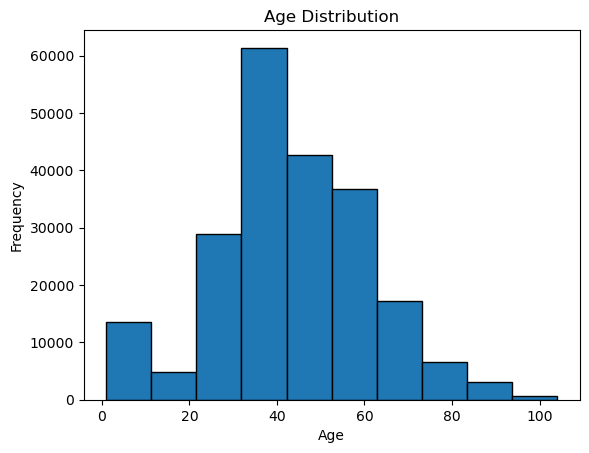

In [24]:

plt.hist(health_insurance_df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# WILL REMOVE LATER

In [25]:
# Bin age into groups as an additional columns  
bins = [0, 14, 25, 64, 104]
labels = ['0-14', '15-25', '26-64', '65+']
health_insurance_df['Age_Group'] = pd.cut(health_insurance_df['Age'], bins=bins, labels=labels, include_lowest=True)
health_insurance_df.head()

,Patient,Age,Sex,Diagnosis_Code,Diagnosis_Description,Med_Code,Med_Description,Quantity,Status,Amount_Billed,Amount_Paid,Age_Group
0,2112140237,37,Male,K21.9,Gastro-esophageal reflux disease without esoph...,17381119111006,(SODIUM CHLORIDE : 9 MG/ML) SOLUTION FOR INFU...,1,Paid,3.00,3.00,26-64
1,2002110188,38,Male,I21.3,ST elevation (STEMI) myocardial infarction of ...,09933855010391,(CLOPIDOGREL (AS BESILATE) : 75 MG) FILM COAT...,4,Rejected,17.44,0.00,26-64
2,1510110229,59,Male,B34.2,"Coronavirus infection, unspecified",01372428020342,(PANTOPRAZOLE (AS SODIUM) : 40 MG) ENTERIC CO...,2,Paid,5.36,5.36,26-64
3,2312040128,38,Male,I69.354,Hemiplegia and hemiparesis following cerebral ...,00271792030391,(AMLODIPINE : 5 MG) (VALSARTAN : 160 MG) FILM...,7,Paid,51.66,51.66,26-64
4,2311110151,44,Male,J32.9,"Chronic sinusitis, unspecified",03551202010381,(GENTAMICIN : 0.3%) EYE OINTMENT,1,Paid,8.50,8.50,26-64


In [20]:
#Checking quanitiy of each unique value in the Diagnosis column 
health_insurance_df['Diagnosis_Description'].value_counts()

COVID-19, virus identified                                                                                                                                        23792
Acute upper respiratory infection, unspecified                                                                                                                     6261
Atherosclerotic heart disease of native coronary artery with unstable angina pectoris                                                                              5834
Non-ST elevation (NSTEMI) myocardial infarction                                                                                                                    5764
Pneumonia, unspecified organism                                                                                                                                    4885
Calculus of ureter                                                                                                                                              

In [32]:
# Binning Diagnoses into broaded categories based on the first two characters of the Diagnosis_Code
health_insurance_df['Diagnosis_Group'] = health_insurance_df['Diagnosis_Code'].str[:2]
health_insurance_df['Diagnosis_Group'].value_counts()
# Perhaps when building the model, we can create a cut off value for smaller categories. 

I2    28757
U0    23792
J0    12309
J1     8836
J3     7696
K6     7430
N2     6544
K8     5956
O3     5898
K3     5413
M5     5162
R1     4550
R5     4511
R0     3610
J2     3579
I4     3262
K4     3088
I1     2846
O8     2771
I6     2646
L0     2439
A4     2420
K5     2229
M7     2085
O6     2057
N1     2054
E8     2018
N3     1938
J4     1904
E1     1792
O7     1729
A0     1725
K2     1705
D4     1686
I5     1553
Z3     1520
H2     1488
S8     1388
I8     1384
D3     1335
N8     1184
C7     1112
O4     1107
S6     1071
R4     1035
G0      913
Z4      873
S0      837
G4      829
O0      822
S5      781
N4      771
B3      762
J9      761
D2      705
N9      701
M3      676
J8      630
M6      587
R2      540
M2      533
C1      528
S4      497
H7      491
H6      475
O1      448
G5      437
I0      413
I3      387
Z9      362
O2      352
T7      327
K7      318
S9      316
D1      311
M8      308
R3      301
D6      267
M1      259
M4      246
S7      246
E0      244
L5      236
H4  

In [31]:
# Exploring the diagnoses descriptions associated with each group 
grouped = health_insurance_df.groupby('Diagnosis_Group')['Diagnosis_Description'].unique()
print(grouped)

Diagnosis_Group
A0    [Infectious gastroenteritis and colitis, unspe...
A1                             [Tuberculous meningitis]
A4    [Sepsis due to Pseudomonas, Sepsis due to Esch...
A5    [Gonococcal infection of lower genitourinary t...
A8                                   [Epidemic vertigo]
A9    [Dengue hemorrhagic fever, Dengue fever [class...
B0    [Varicella without complication, Herpesviral i...
B2    [Other infectious mononucleosis without compli...
B3    [Coronavirus infection, unspecified, Adenoviru...
B4          [Subcutaneous pheomycotic abscess and cyst]
B5    [Plasmodium falciparum malaria, unspecified, P...
B6    [Other echinococcosis, Echinococcosis, unspeci...
B9    [Unspecified Escherichia coli [E. coli] as the...
C0           [Malignant neoplasm of mouth, unspecified]
C1    [Malignant neoplasm of ascending colon, Malign...
C4    [Basal cell carcinoma of skin of other parts o...
C5    [Malignant neoplasm of central portion of left...
C6    [Malignant neoplasm of ove

In [27]:
health_insurance_df['Diagnosis_Code'].value_counts()

U07.1       23792
J06.9        6261
I25.110      5834
I21.4        5764
J18.9        4885
N20.1        3561
R50.9        3288
K35.80       3059
O34.219      2905
J22          2842
I25.10       2764
I24.9        2718
K80.00       2708
I21.3        2402
I21.09       2030
J02.9        2023
O80          1806
N20.0        1742
E86.0        1690
N39.0        1628
I25.119      1603
J10.1        1569
M79.1        1551
K64.2        1446
K64.3        1413
R07.9        1412
J32.9        1309
A09          1300
J03.90       1140
J32.4        1109
I63.9        1099
K61.3        1089
J32.0        1055
M51.17       1037
R19.7        1008
M51.16       1007
I16.9        1002
D35.2         964
A41.52        947
O82           935
K35.2         912
I46.9         902
C73           876
I21.19        826
N17.9         811
I11.9         803
K40.90        798
Z38.01        788
I20.0         781
K35.3         744
O34.211       716
R42           677
J35.01        667
J90           655
K80.10        652
R10.9     

In [21]:
#Checking quanitiy of each unique value in the Medication column 
health_insurance_df['Med_Description'].value_counts()

(PARACETAMOL : 10 MG/ML)  SOLUTION FOR INFUSION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         15651
(SODIUM CHLORIDE : 0.9% W/

In [23]:
#Output CSV
health_insurance_df.to_csv('../Resources/Health_insurance_clean.csv', index=False)